# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


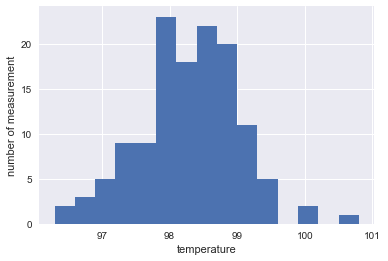

In [5]:
sns.set()
_ = plt.hist(df['temperature'], bins=15)
_ = plt.xlabel('temperature')
_ = plt.ylabel('number of measurement')
plt.show()

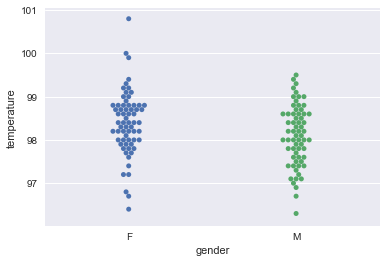

In [6]:
_ = sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.xlabel('gender')
_ = plt.ylabel('temperature')
plt.show()

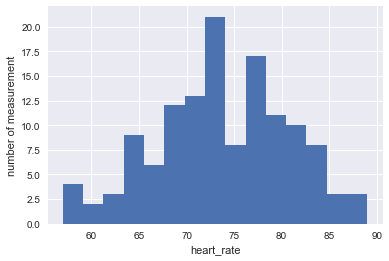

In [7]:
sns.set()
_ = plt.hist(df['heart_rate'], bins=15)
_ = plt.xlabel('heart_rate')
_ = plt.ylabel('number of measurement')
plt.show()

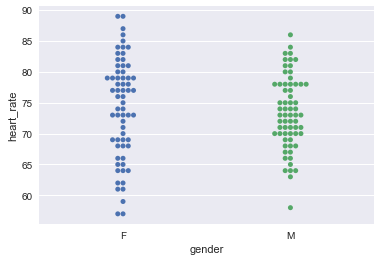

In [8]:
_ = sns.swarmplot(x='gender', y='heart_rate', data=df)
_ = plt.xlabel('gender')
_ = plt.ylabel('heart_rate')
plt.show()

# 1. Is the distribution of body temperatures normal?

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


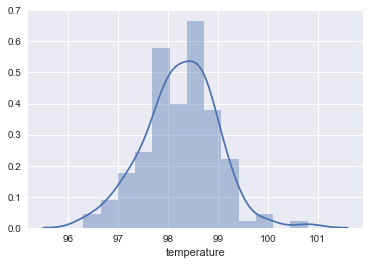

In [9]:
sns.distplot(df['temperature'])

In [10]:

# Define a function to compute the CDF

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n= len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)
    
    return x, y

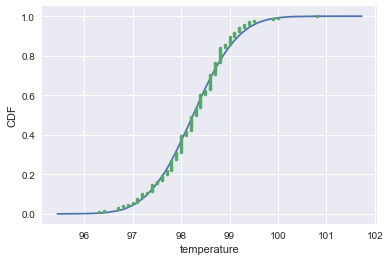

In [11]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean, std, size=100000)
x, y = ecdf(df['temperature'])
x_theor, y_theor = ecdf(samples)
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()

In [12]:
stats.normaltest(df['temperature']) # alpha = 0.05

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

Acoording to the results above, we can say that the distribution of body temperatures is normal.

# 2. Is the sample size large? Are the observations independent?

#### a. Is the sample size large? 

In [13]:
len(df)

130

Sample size is > 30. It is  accepted as large enough that if the sample has more than 30 observations. So in this case, the sample size is large.

#### b. Are the observations independent?? 

The observations (temperature and heart rate) are not affected by the measurements of another person. And also we figured out that the sampled distribution is normal distrubuted. We can say that observations are independent.

# 3. Is the true population mean really 98.6 degrees F?
#### . First, try a bootstrap hypothesis test.
#### . Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
#### . In this situation, is it appropriate to use the  tt  or  zz  statistic?
#### . Now try using the other test. How is the result be different? Why?

#### a. First, try a bootstrap hypothesis test. For the purpose of a bootstrap hypothesis test, we define:

        Null Hypothesis: The true population mean is 98.6 degrees F.
        Alternate Hypothesis: The true population mean is not 98.6 degrees
    
        Significance level = 0.05

In [14]:
np.mean(df['temperature'])

98.24923076923078

In [15]:
np.random.seed(42)
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [16]:
def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range (size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [17]:
replicates  = draw_bs_reps(df['temperature'], np.mean, size = 10000)

In [18]:
# Compute the confidence interval
conf_int = np.percentile(replicates,[2.5, 97.5])
print('95% confidence interval =', conf_int)

95% confidence interval = [98.12461538 98.37384615]


In [19]:
# Compute the p-value
p = np.sum(replicates >= 98.6) / len(replicates)
print ('p-value = ', p)

p-value =  0.0


RESULT: p-value is less than our significance level (0.05), we reject the null hypothesis. It means that the actual population mean is likely different than 98.6 degrees.

In [20]:
true_mean = 98.6
In [2]: temp_shifted = df.temperature - np.mean(df.temperature) + true_mean

In [21]:
def diff_from_truemean(data, true_mean=98.6):
    return np.mean(data) - true_mean

diff_obs = diff_from_truemean(df.temperature)
diff_obs

-0.35076923076921673

In [22]:
bs_replicates = draw_bs_reps(temp_shifted, diff_from_truemean, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / 10000
p_value

0.0

Conclusion for the bootstrap hypothesis test:
      Since p-value is less than 0.05, we reject the null hypothesis in favor of the alternative hypothesis.It means that the actual population mean is likely different than 98.6 degrees.

#### b. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

I would use a one-sample test because we will compare one set of data (df.temperature) to a single number (true population mean = 98.6 )

#### c. In this situation, is it appropriate to use the  t  or  z  statistic?

In this situatioan, it is appropriate to use "z test" because we have enough records to apply central limit theorem (sample size = 130 which is > 30). A "t-test" is best for small sample sizes.

In [23]:
# Calculate standard error of the mean:
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))

# Calculate and save z-statistic:
z = (np.mean(df.temperature) - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.475925202078116
p-value: 4.3523151658821886e-08


The z-statistic shows that a population mean of 98.6 would be observed more than 5 standard deviations from a population mean.

#### d. Now try using the other test. How is the result be different? Why?

In [24]:
t, p = stats.ttest_1samp(df.temperature, 98.6)
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


The t-statistic is very close to the z-statistic. As we increase the sample size, the t-test will converge to yield a similar result as a z-test.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
   #### Which one is the correct one to use?
   #### What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

#### a. Which one is the correct one to use?

It is correct to use t-test, because the sample size is small, and the population standard deviation is unkown.

#### b. What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [25]:
temp_small_sample = np.random.choice(np.array(df['temperature']), size=10, replace=True)

In [26]:
# Calculate standard error of the mean:
sem = np.std(temp_small_sample) / np.sqrt(len(temp_small_sample))

# Calculate and save z-statistic:
z = (np.mean(temp_small_sample) - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -1.514456332038456
p-value: 0.12991014119635289


In [27]:
t, p = stats.ttest_1samp(temp_small_sample, 98.6)
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -1.4367394278317265
p-value: 0.18462973816229541


Each time we run the code, we get nearly completely different z and t statistics and p values because the sample size is too small to interfere. Therefore both statistics are not reliable at this point.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
   #### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
   #### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

#### a-1. Bootstrap approach

In [28]:
replicates_small  = draw_bs_reps(df['temperature'], np.mean, size = 10000)

In [29]:
# Compute the confidence interval
conf_int = np.percentile(replicates_small, [2.5, 97.5])
print('95% confidence interval =', conf_int)

95% confidence interval = [98.12692308 98.37538462]


We can conclude that someone's body temperature lower than 98.12 or higher than  98.37 can be considered abnormal.

#### a-2.Frequentist approach

Margin of error(moe) = Critical value x Standard error of the statistic

In [30]:
#SE = (np.std(x)/np.sqrt(len(x)))
SE = (np.std(df.temperature)) / np.sqrt(len(df.temperature))

# t-critical at 95% confidence Level with 129 degrees of freedom
t_c = stats.t.ppf(0.975, df=len(df.temperature)-1) 

# Margin of Error
moe = t_c * SE

# Confidence Interval
Confidence_int = np.mean(df.temperature) - moe , np.mean(df.temperature) + moe
Confidence_int

(98.12249318821641, 98.37596835024515)

We can conclude that someone's body temperature lower than 98.12 or higher than  98.37 can be considered abnormal.

## 6. Is there a significant difference between males and females in normal temperature?
   #### What testing approach did you use and why?
   #### Write a story with your conclusion in the context of the original problem.

#### a. What testing approach did you use and why?
 we use a two-sample t-test. We have two sample distributions (male and female), and a t-test is appropriate given that we do not know the population standard deviations for the two samples.

In [31]:
df_female = df[df['gender'] == 'F']
df_male = df[df['gender'] == 'M']
female_temp = df_female.temperature
male_temp = df_male.temperature
female_mean = np.mean(df_female.temperature)
male_mean = np.mean(df_male.temperature)
print('female_mean :', female_mean)
print('male_mean :', male_mean)

female_mean : 98.39384615384613
male_mean : 98.1046153846154


As we see, there is a difference between the mean temperatures of females and males in the sample data. Now we will figure out if this difference is statically significant.

Null Hypothesis: Mean of female and male human body temperatures are equal.

Alternative Hypothesis : Mean of female and male human body temperatures are not equal.

Significance Level: 0.05

In [32]:
temp_diff_ttest, temp_diff_pval = stats.ttest_ind(a=female_temp, b=male_temp, equal_var=False)
print('statistic :', abs(temp_diff_ttest), 'p_value', abs(temp_diff_pval))

statistic : 2.285434538165611 p_value 0.023938264182934196


P value is greater than significance level. We reject the Null Hypothesis. Male body temperatures were found to be statistically different from female body temperatures. 

#### b. Write a story with your conclusion in the context of the original problem.

We concluded that the sample size was large enough to apply Central Limit Therom and we figured out that the temperature sample data is normally distributed.

Using both Bootstrap approach and Frequentist approach, the population mean is different than 98.6 degrees.

In researching a reasonable range for body temperature, and using a 95% confidence interval, We can conclude that someone's body temperature lower than 98.12 or higher than 98.37 can be considered abnormal.

Lastly, we apllied the two-sample test and see that there is a difference between female and male body temperatures.